In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import string
import nltk

In [2]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
tweet= pd.read_csv("Elon_musk.csv",encoding='cp1252',error_bad_lines=False)
tweet

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
txt = [i.strip() for i in tweet.Text]

In [5]:
string=" ".join(txt)

In [6]:
string

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [7]:
import nltk

In [8]:
from nltk import tokenize

In [9]:
sentence= tokenize.sent_tokenize(string)

In [10]:
dataframe= pd.DataFrame(sentence,columns=['sentence'])

In [11]:
dataframe.head()

,sentence
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!


In [12]:
afinn=pd.read_csv("afinn.csv",encoding='cp1252')

In [13]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [14]:
affinity_score=afinn.set_index('word')['value'].to_dict()

In [15]:
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [16]:
! python -m spacy download en_core_web_sm

2022-04-10 12:50:25.445107: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-10 12:50:25.445810: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
import en_core_web_sm

In [18]:
nlp = en_core_web_sm.load()

In [19]:
affinity_lexicons= affinity_score

In [21]:
def sentiment_analysis(text: str=None):
    sent_score=0
    
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score += affinity_lexicons.get(word.lemma_,0)
            return sent_score

In [22]:
dataframe['sentence_value']= dataframe['sentence'].apply(sentiment_analysis)

In [23]:
dataframe

,sentence,sentence_value
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated @teslacn Congr...,0
4,Now on to the next for even more!!,0
...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0
910,"It may never pay out, as the stock can’t b… ht...",0
911,Details Aug 28.,0
912,AI symbiosis while u wait @vistacruiser7 @flcn...,0


In [24]:
dataframe['word count']=dataframe['sentence'].str.split().apply(len)

In [25]:
dataframe

,sentence,sentence_value,word count
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,0,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can’t b… ht...",0,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47


In [28]:
dataframe.sort_values(by='sentence_value').head()

,sentence,sentence_value,word count
607,Problems like that have been addressed.,-2,6
298,No symptoms right now.,-1,4
373,No problem if there’s a way get current design...,-1,13
885,No expert installer required.… https://t.co/xn...,-1,36
241,No heat shielding needed.,-1,4


In [29]:
dataframe[dataframe['sentence_value']<=0]

,sentence,sentence_value,word count
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,0,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can’t b… ht...",0,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47


In [30]:
dataframe[dataframe['sentence_value']>10]

,sentence,sentence_value,word count


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentence_value', ylabel='Density'>

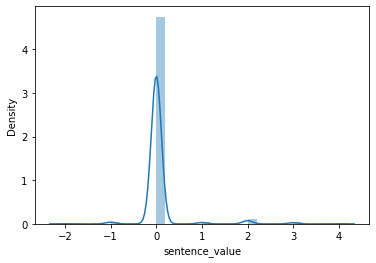

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataframe['sentence_value'])

In [32]:
dataframe['index']= dataframe.index

<AxesSubplot:xlabel='index', ylabel='sentence_value'>

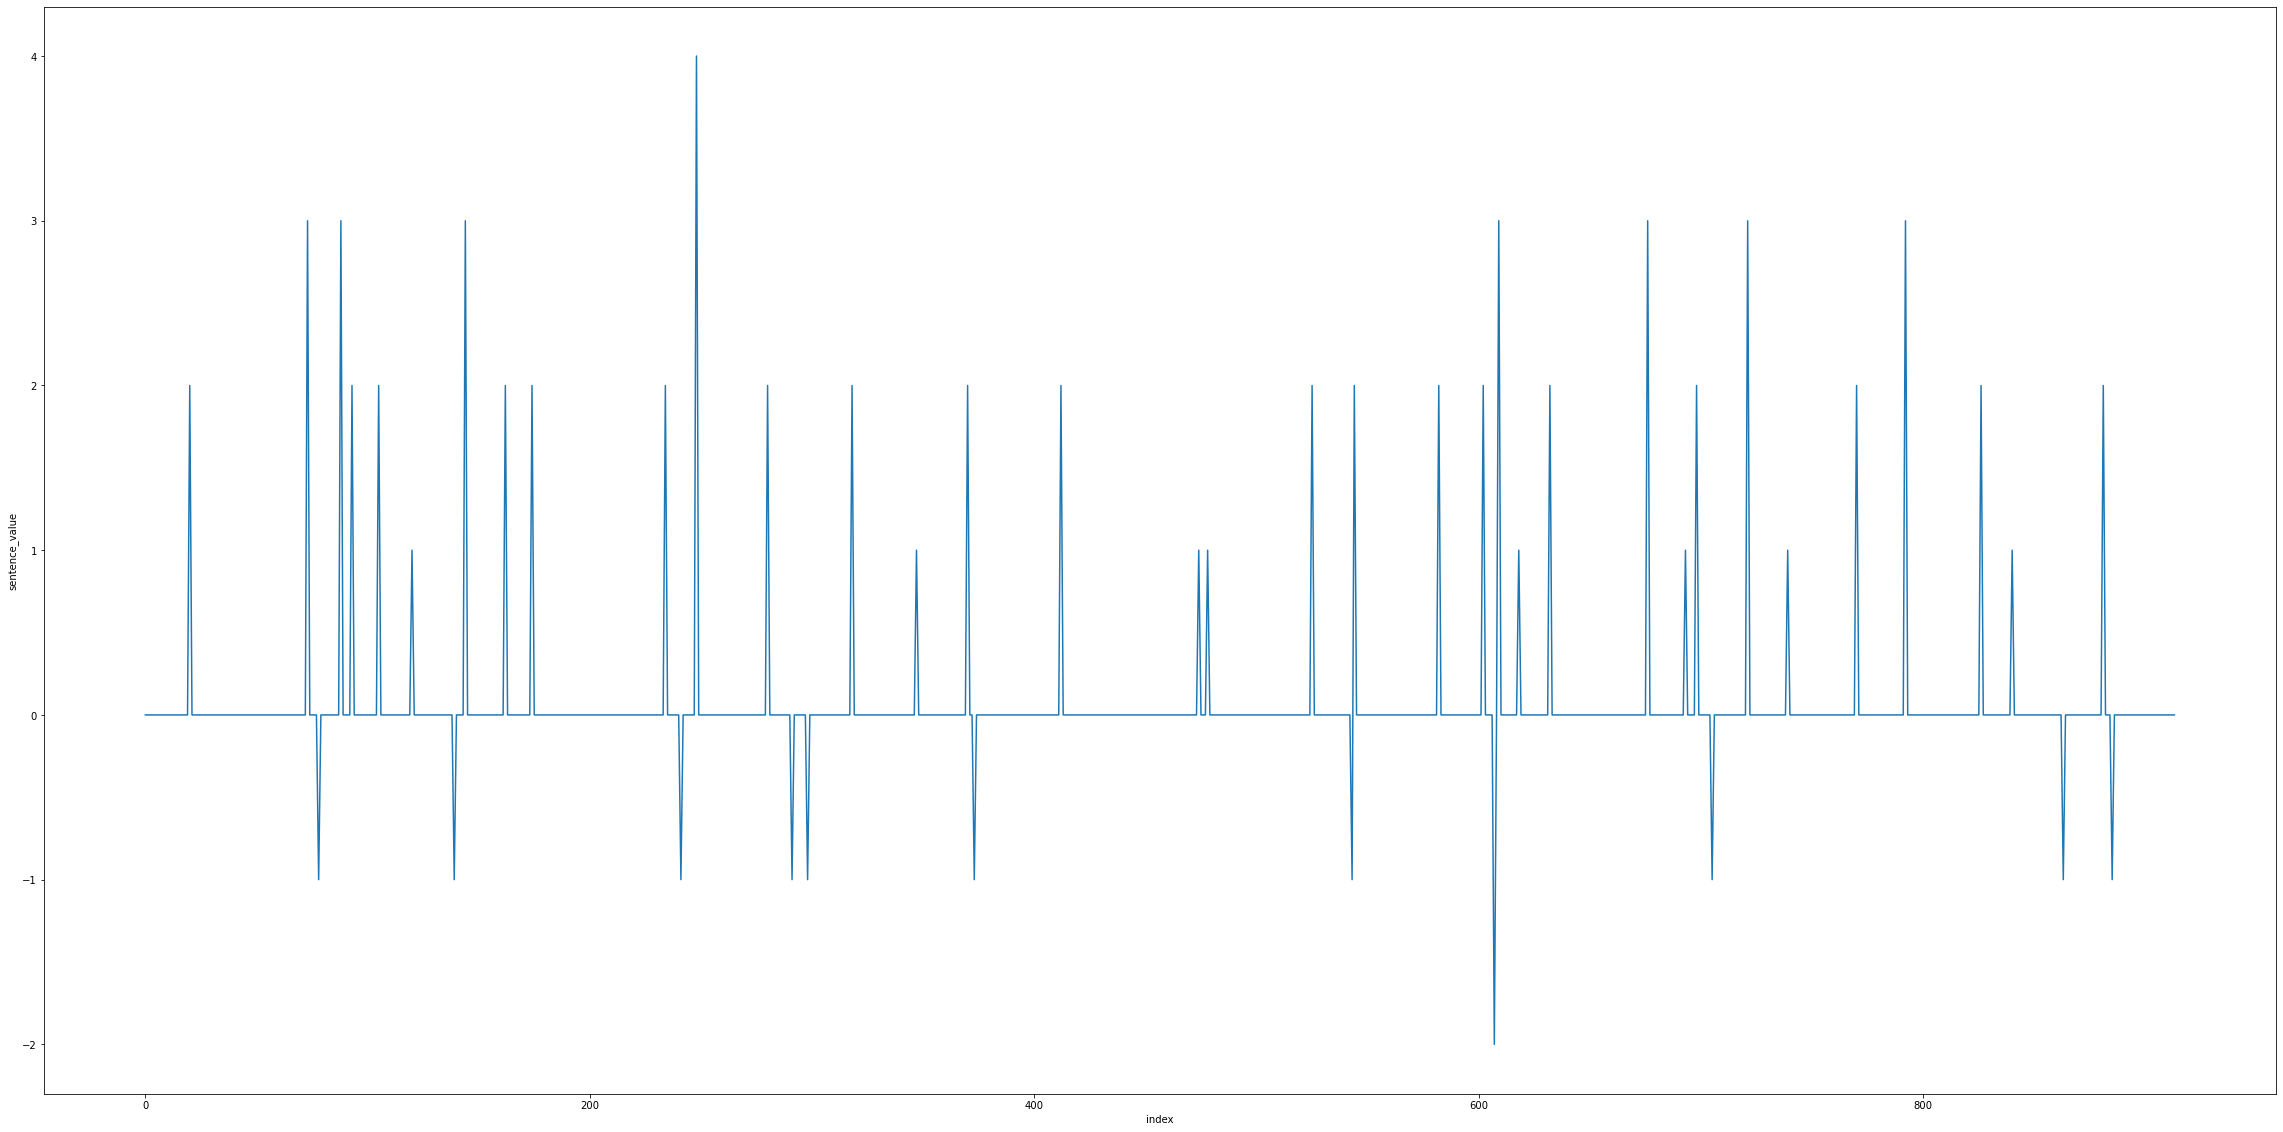

In [33]:
plt.figure(figsize=[40,20])
sns.lineplot(y='sentence_value', x='index', data= dataframe)

<AxesSubplot:title={'center':'sentiment analysis of the elon musk tweets'}, xlabel='word count', ylabel='sentence_value'>

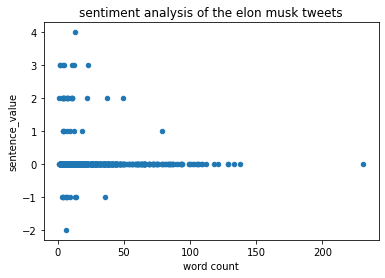

In [34]:
dataframe.plot.scatter(y='sentence_value', x= 'word count',title='sentiment analysis of the elon musk tweets')